# Lab 1 - MSDS 7331 Section 404
### Chris Irwin, Damon Resnick, Josh Klein, and Anna Frowein

## Business Understanding

Purchasing a home is one of the largest purchases individuals will generally make in their lifetime, understanding the value of the house is an important step in the process of purchasing or selling of a house.  Zillow, an online real-estate database allows for consumers to research estimated market values in the different areas.  The estimated market value is calculated daily using public housing information and user inputted data in the calculation, Zillow calls this estimate a “Zestimate.”  While Zestimates are not available in all areas, Zillow has released that since their launch the median margin of error has improved from 14% to approximately 5.5%.

Zillow in an effort to improve the median margin of error of their algorithm has released some of their data for a Kaggle competition.  The goal of the competition is to create an algorithm that will improve the median margin of error from its current value of 5.5%.  We will be working within the goals of the Kaggle competition and will use the Kaggle scores for submissions and the median margin of error to judge the effectiveness of the prediction algorithm.  

In this paper, we will be performing the initial exploratory data analysis.  We will use statistics and visualizations to explore and gain an understanding of the data for future analysis.  


## Data Understanding

We will be using the data set properties_2016.csv from the Zillow Prize: Zillow's Home Value Prediction (Zestimate) Kaggle competition.  The dataset contains all properties from Los Angeles County, Orange County and Ventura County in California, along with the home features for 2016. The data is provided by Zillow with what is gathered through public records and through user entered data points.  

### Data Meaning Type

The data set has 58 variables describing the different features or characteristics of a home, including number of bedrooms, location detail, square footage, number of bathrooms, type of heating/cooling sytems, and ect.

this is where i am trying to show the list of variables and their values.

In [1]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
dfZillowData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv')
#dfZillowData = pd.read_csv('/Users/joshuaklein/Desktop/properties_2016.csv') 
#dfZillowData = pd.read_csv('/users/anna_frowein/Documents/SMU/Properties_2016.csv')
#dfZillowData = pd.read_csv("C:/Users/hp/Desktop/SMU/Data Mining/Project/Data/properties_2016.csv")

dfTrainingData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/train_2016.csv')


#Create new data set that contains both the data zillow and the data to train against
dfFullTestData = pd.merge(dfTrainingData, dfZillowData, on='parcelid', how='left')

#Remove 2.9 million records from memory
del dfZillowData


#Get the headers to ensure all columns are included.
dfFullTestData.head(10)

/Users/cmirwin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [2]:
#Show the column data types for the data set 
dfFullTestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90811 entries, 0 to 90810
Data columns (total 60 columns):
parcelid                        90811 non-null int64
logerror                        90811 non-null float64
transactiondate                 90811 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

# Data Meaning Type

### Data Quality

The below chart was created to show the attributes with missing data values.  As we reviewed the data we decided that attributes missing 80% or more data points would be removed from our analysis.  We made the decision to remove the attributes rather than replacing the null values with a value derived for the remaining values because there was not a large enough sample to provide an estimated value for the nulls.  For attributes that had less than 80% missing values, we reviewed the attributes individually to determine how to treat them.  The below chart was created to show the attributes with missing data values for attributes with less than 80% missing values.

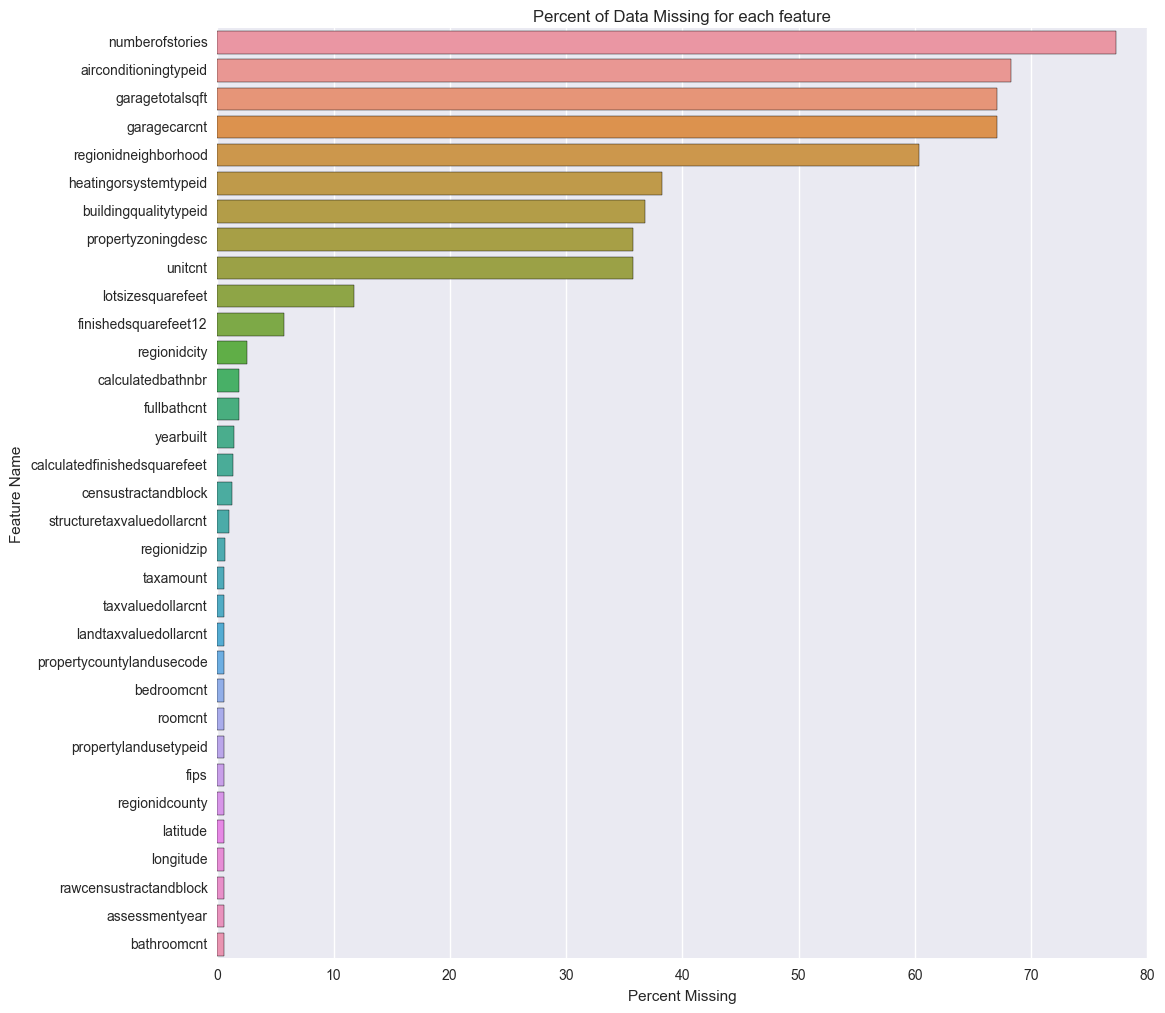

In [3]:
#Look to see if there are any missing values in data frame
#dfZillowData.isnull().values.any()

#Find all columns with missing data 
dfMissingZillowData = (dfFullTestData.isnull().sum() / len(dfFullTestData)) * 100

#Delete from dataframe with values of 0
dfMissingZillowData = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData == 0].index).sort_values(ascending=False)

#Create new data frame with attritbutes that have no missing values
#dfNoMissingValues =  dfMissingZillowData[dfMissingZillowData == 0].sort_values(ascending=False)

#Create new dataframe any values greater than 80%
dfMajorityOfDataMissing = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData < 80].index).sort_values(ascending=False)

#Create new dataframe with total missing less than 80%
dfMissingZillowData = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData > 80].index).sort_values(ascending=False)


#Create Graph that shows the missing data
#Set Color palette to standard
color = sb.color_palette()

#set up Figure size
f, ax = plt.subplots(figsize=(12, 12))

#Rotate lables
plt.xticks(rotation='0')

#Add Bar Plots
sb.barplot(y=dfMissingZillowData.index, x=dfMissingZillowData)

#Add Titles to Graph
ax.set(title='Percent of Data Missing for each feature', xlabel='Percent Missing', ylabel = 'Feature Name')

After the threshold of 80% missing values was applied, we can see that there are still missing or not available (NaN) values.  For the attributes with classification scales, such as heatingorsystemtypeid and airconditioningtypeid we replaced the missing values with the value that represent "None" in the data dictionary provided by Zillow.  For the numberofstories attribute we assigned the value "1," since a house has to have at least one story.  We chose to replace other missing variables with the median value of the attribute, for attributes of square footage, number of rooms, etc. we believe this would provide the best indication of the "average" house in these areas without having the values skewed by outliers.

In [4]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns by replacing missing values with 0 and other values with 1.
#print(dfMajorityOfDataMissing)

dfFullTestData['hasbasement'] = dfFullTestData[['basementsqft']].where(dfFullTestData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfFullTestData['hasdeck'] = dfFullTestData[['yardbuildingsqft26']].where(dfFullTestData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfFullTestData['hasfireplace'] = dfFullTestData[['fireplaceflag']].where(dfFullTestData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfFullTestData['haspatio'] = dfFullTestData[['yardbuildingsqft17']].where(dfFullTestData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Combines two attributes to make a new binary attribute.
dfFullTestData['hashottuborspa'] = dfFullTestData[['hashottuborspa', 'pooltypeid2']].where(dfFullTestData[['hashottuborspa','pooltypeid2']].isnull(), 1).fillna(0).astype(int)

#Create log dollars of all money columns
dfFullTestData['logtaxvalue'] = np.log(dfFullTestData['taxvaluedollarcnt'])

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angles County'
    else:
        val = 'Orange County'
    return val

dfFullTestData['countyname'] = dfFullTestData.apply(rename, axis=1)

print 'Columns added'

Columns added


### Simple Statistics



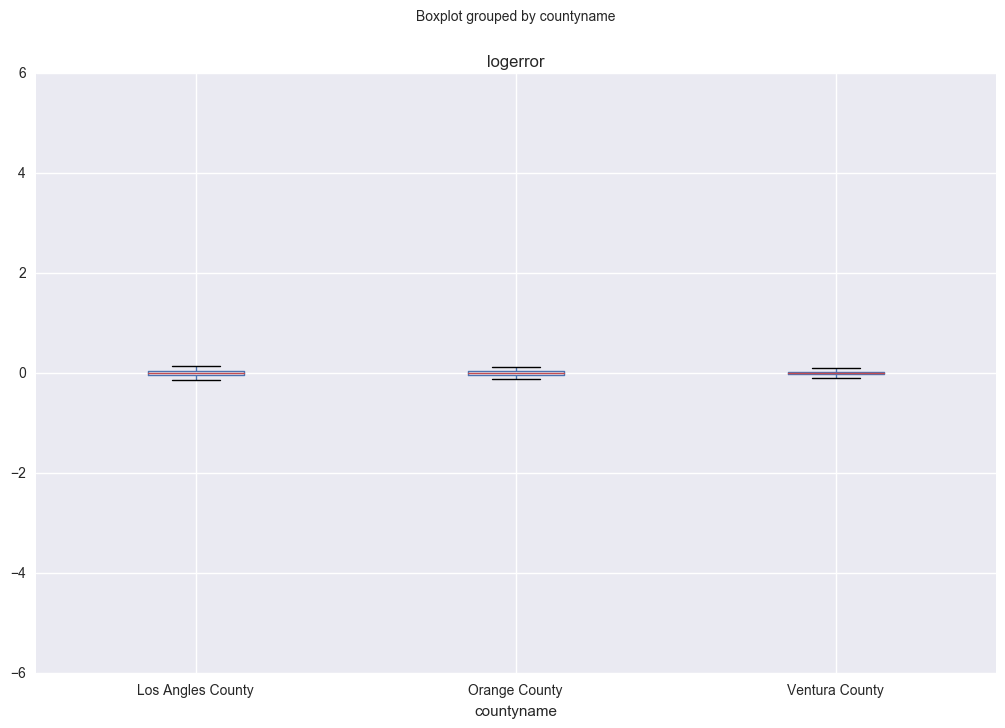

In [44]:
#Create New data frame for everything
dfForModel = dfFullTestData.replace(to_replace='NaN',value= np.nan) 

#Get median values for based on original values
dfMedians = pd.DataFrame(dfFullTestData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt','garagecarcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))


#Set Column Name
dfColumns.columns = ['updatevalue']


#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create smaller data set for descriptive stats section
dfDataForStats = dfForModel[['bathroomcnt',
                               'bedroomcnt',
                               'finishedfloor1squarefeet',
                               'calculatedfinishedsquarefeet',
                               'finishedsquarefeet15',
                               'lotsizesquarefeet',
                               'logtaxvalue',
                               'structuretaxvaluedollarcnt',
                               'landtaxvaluedollarcnt',
                               'taxamount',
                               'logerror']]

dfDataForStats.describe()

x = dfForModel.logerror
a = abs(dfForModel.logerror)
y = dfForModel.logtaxvalue
b = dfForModel.bedroomcnt
z = dfForModel.countyname

dfForTax = pd.DataFrame(dict(logerror=x, abserror=a, taxvalue=y, countyname=z ))

#Create a boxplot
dfForTax.boxplot('logerror', by='countyname', figsize=(12, 8))



In [16]:
#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))

#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Delete from model 
#dfForModel.drop(['heatingorsystemtypeid'], inplace=True, axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#As you can see we have gone from 58 columns in the original data set to 244 now with 
#the creation of Dummy variables and binary variables
dfForModel.describe()



,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,LandUseTypeId_248.0,LandUseTypeId_260.0,LandUseTypeId_261.0,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_275.0
count,9.081100e+04,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,90811.0,90811.000000,90811.000000,...,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000,90811.000000
mean,1.299360e+07,0.010816,3.991003,7.000661,0.337889,2.266020,3.013974,4.0,6.093788,2.303366,...,0.009679,0.000683,0.673630,0.000925,0.000121,0.003920,0.251236,0.000308,0.025702,0.000507
std,2.504000e+06,0.163288,2.235540,0.145859,18.152109,1.016413,1.176174,0.0,1.661519,0.967812,...,0.097907,0.026120,0.468887,0.030400,0.011005,0.062489,0.433726,0.017557,0.158245,0.022501
min,1.071174e+07,-4.605000,1.000000,2.000000,0.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.156440e+07,-0.026300,1.000000,7.000000,0.000000,2.000000,2.000000,4.0,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.255372e+07,0.005000,5.000000,7.000000,0.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.423720e+07,0.039200,5.000000,7.000000,0.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exceptional work: PCA

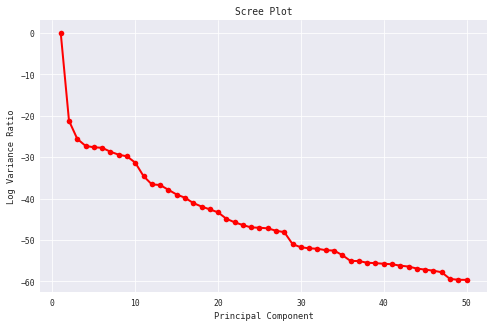

In [30]:
#AF: Can this be moved to the end without any implecations on the code cells below it?  Exceptional Work section

#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64'])
    
#Create Object only Datafram
dfZillowDataCat = dfDataTypes.select_dtypes(['object'])


#Complete PCA to help with eliminating variables 
#Using only numeric Data
ZillowDataPCA = dfZillowDataNumeric

components = 50

pca = PCA( n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowDataPCA).transform(ZillowDataPCA) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_

logvariance_ratio = np.log(variance_ratio)

#Run PCA
#ZillowDataPCA_pca = pca.fit(ZillowDataPCA).transform(ZillowDataPCA) # fit data and then transform it

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, logvariance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Log Variance Ratio')
plt.show()


### Visualize Attributes

The first attributes we reviewed were related to the location of the houses in the data set, using latitude and longitude the below map was created with the housing locations and color coded by county.  The map below shows the majority of the houses are found in LA County (Blue).

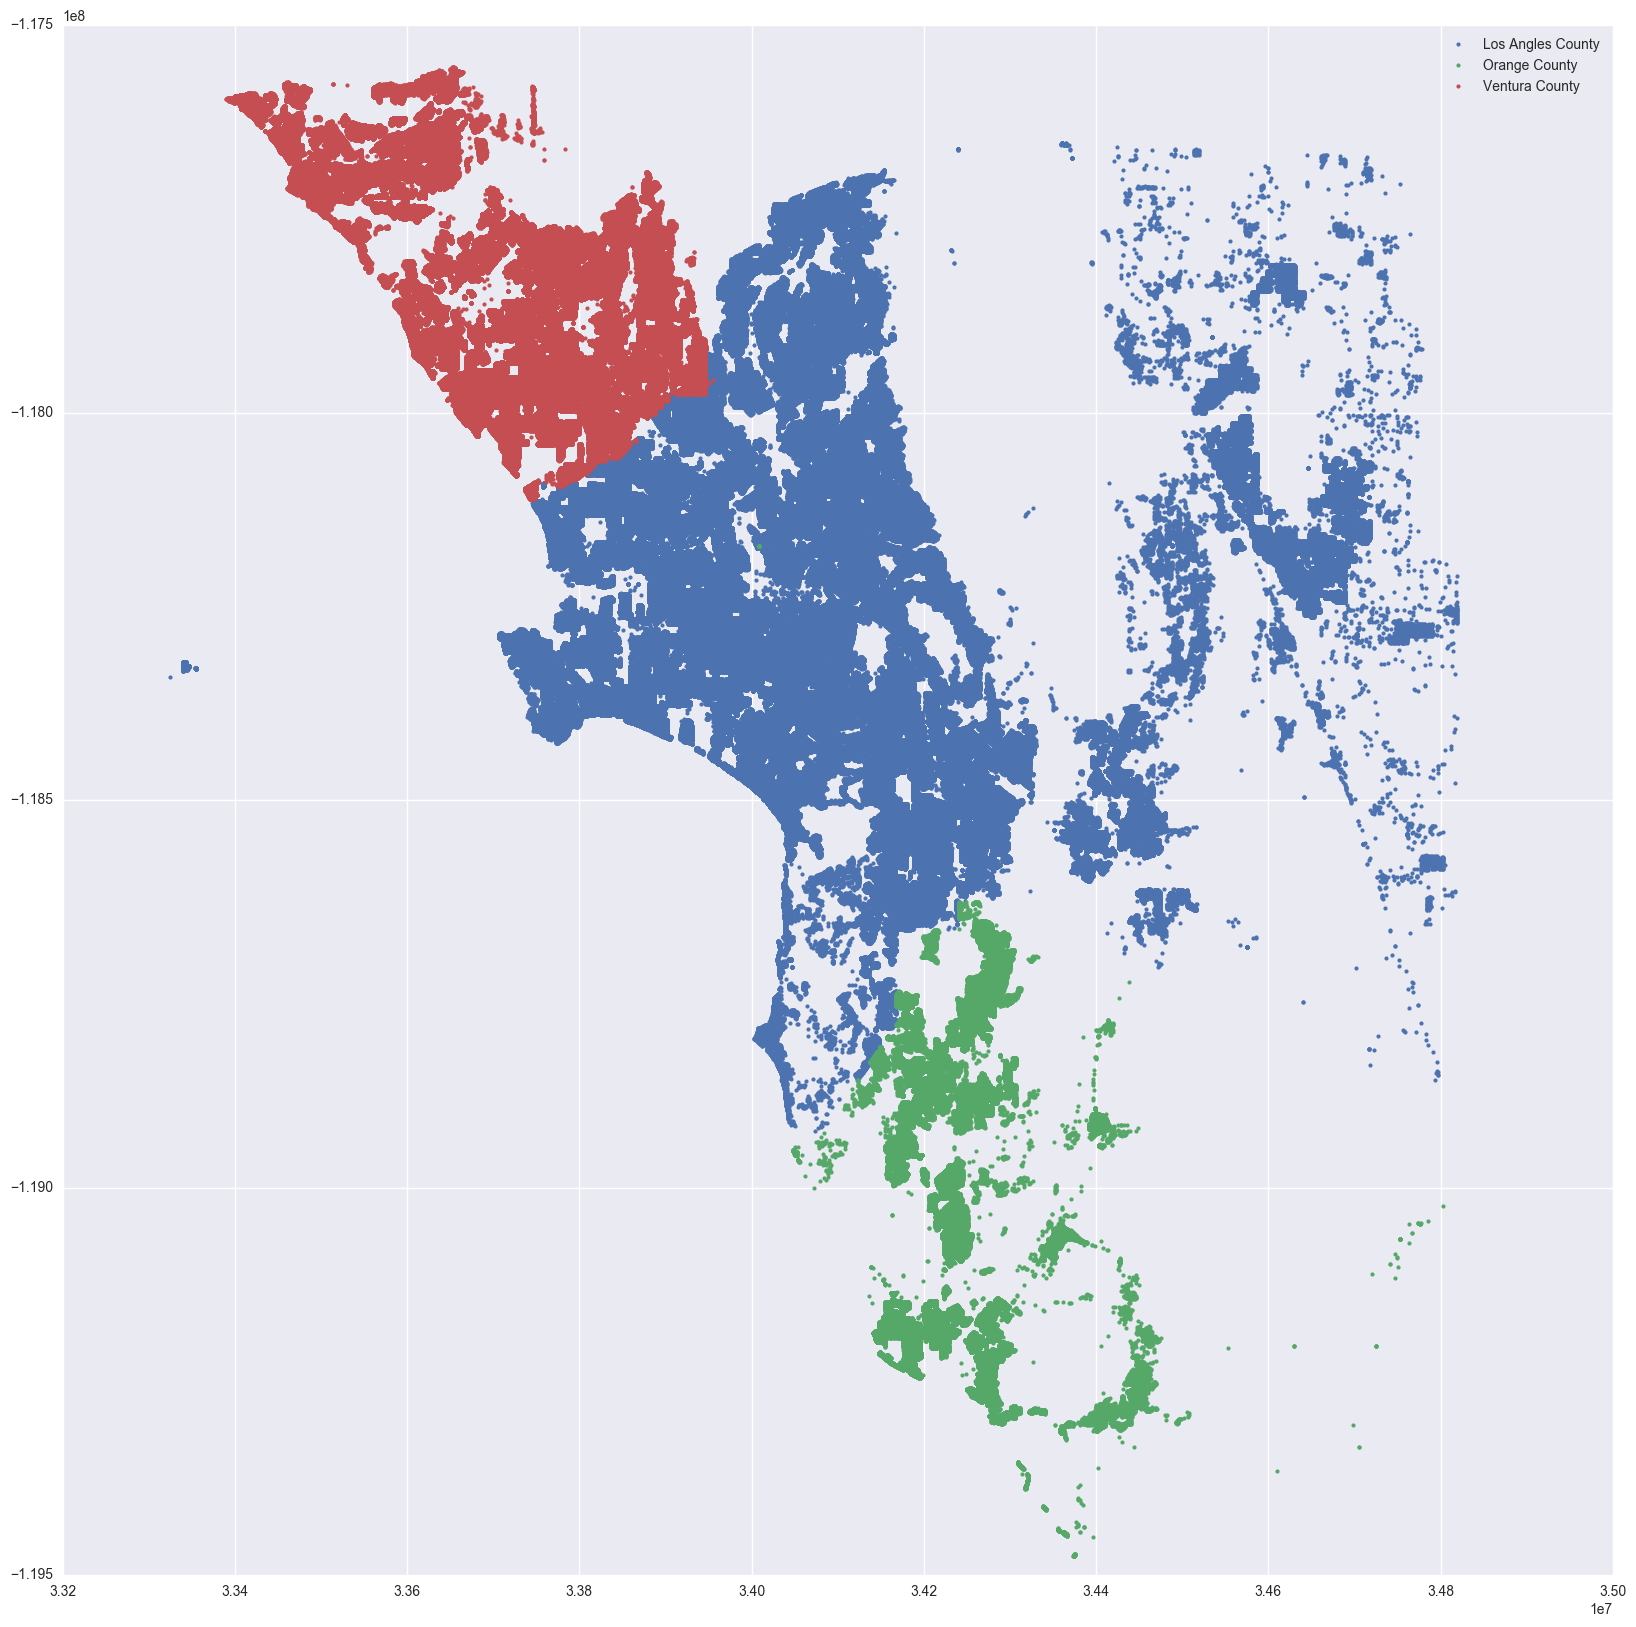

In [9]:
# Generate Data
x = dfForModel.latitude
y = dfForModel.longitude
labels = dfForModel.countyname
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots(figsize=(20,20))
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=6, label=name)
ax.legend()

plt.show()

In [10]:
zil_columns = dfForModel[['taxvaluedollarcnt','bedroomcnt','countyname']]
phase_1_2 = zil_columns.groupby(['countyname','bedroomcnt']).mean()
phase_1_2 = phase_1_2.reset_index()
phase_1_2.pivot('countyname','bedroomcnt','taxvaluedollarcnt').head()

bedroomcnt,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
countyname,,,,,,,,,,,,,,,,,,,,,
Los Angles County,566448.776219,244384.742140,301427.663672,346170.308047,469124.712865,755497.269611,8.283121e+05,1.005172e+06,6.827878e+05,7.492150e+05,...,1.201277e+06,762843.536188,1.563532e+06,1.163755e+06,917789.807692,882001.276923,445685.375,2804854.4,596857.333333,1.832988e+06
Orange County,273027.671178,208427.626004,261711.887866,344272.207820,445582.096302,649211.854953,8.556702e+05,1.025703e+06,1.288165e+06,1.394238e+06,...,1.741851e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ventura County,330574.296456,239827.874749,333190.057077,420525.544790,531205.138466,819342.389073,1.063447e+06,1.308985e+06,1.598030e+06,1.647812e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


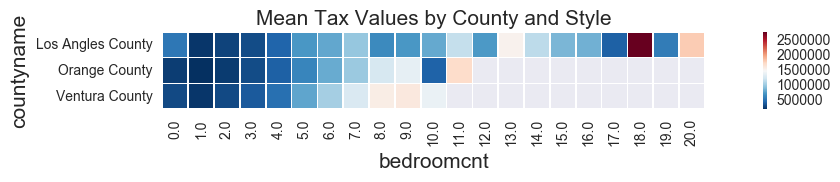

In [11]:
plt.figure(figsize=(15,1))
pivot_table = phase_1_2.pivot('countyname','bedroomcnt','taxvaluedollarcnt')
plt.xlabel('County', size = 15)
plt.ylabel('Number of Bedrooms', size = 15)
plt.title('Mean Tax Values by County and Style', size = 15)
sb.heatmap(pivot_table, annot=False, fmt=".1f", linewidths=.5, square = True, cmap = 'RdBu_r');

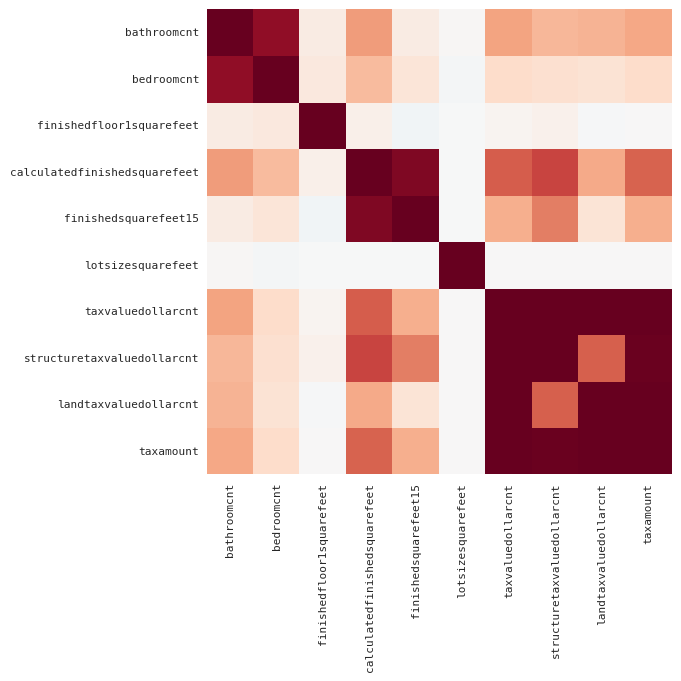

In [14]:
sb.set(context="paper", font="monospace")

# Load the datset
corrmatrix = dfDataForStats.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Draw the heatmap using seaborn
sb.heatmap(corrmatrix, vmax=.8, square=True, cbar=False)

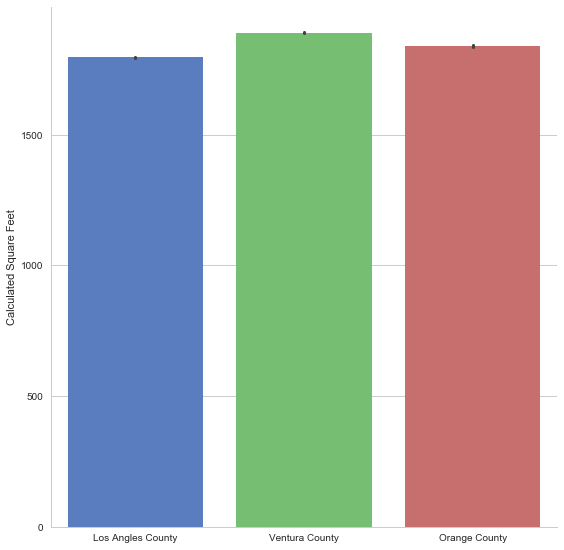

In [83]:
dfDataForStats2 = dfForModel[['countyname',
                               'calculatedfinishedsquarefeet','regionidcounty']]
sb.set(style="whitegrid")

g = sb.factorplot("countyname", "calculatedfinishedsquarefeet",
                   data=dfDataForStats2, kind="bar",
                   size=8, palette="muted", legend=False)
g.fig.get_axes()[0].set_ylabel("Average Calculated Square Feet")
g.fig.get_axes()[0].set_xlabel("")
g.fig.get_axes()[0].set_yticks(range(0, 2000, 500))
plt.show()